#                       HOUSE PRICE PREDICTION PROJECT

# PRCP-1020-HousePricePred

## Problem Statement

#### Task 1:-Prepare a complete data analysis report on the given data.

#### Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

#### Task3:-Suggestions to the Bank market team to make  customers  buy the product.


## Bussiness Case: To predict total sales price by using features which customer will buy the product 

## Introduction:

### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the ## proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price
### negotiations than the number of bedrooms or a white-picket fence.
### With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition
### challenges you to predict the final price of each home.


# List Of Contents:
1. Importing Libraries
2. Attributes' Information
3. Basic Checks
4. Exploratory Data Analysis
5. Data Pre-Processing
6. Feature Selection
7. Model Creation
8. Model Evaluation
9. Evaluation Summary
10. Conclusion

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

## Loading Dataset

In [2]:
data=pd.read_csv('Data.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
data.drop("Id",axis=1,inplace=True) #dropping Id(useless) column.

In [4]:
data.head(pd.set_option("display.max_columns",None)) #display maximum columns

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [5]:
data.head(pd.set_option("display.max_rows",None)) #display maximum rows

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
13            20       RL         91.0    10652   Pave   NaN      IR1   
14            20       RL          NaN    10920   Pave   NaN      IR1   
15            45       RM         51.0     6120   Pave   NaN      Reg   
16            20       RL          NaN    11241   Pave   NaN      IR1   
17            90       RL         72.0    10791   Pave   NaN      Reg   
18            20       RL         66.0    13695   Pave   NaN      Reg   
19            20       RL         70.0     7560   Pave   NaN      Reg   
20            60       RL        101.0    14215   Pave   NaN      IR1   
21            45       RM         57.0     7449   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave   NaN      Reg   
23           120       RM         44.0     4224   Pave   NaN      Reg   
24            20       RL          NaN     8246   Pave   NaN      IR1   
25            20       RL        110.0    14230   Pave   NaN      Reg   
26            20       RL         60.0     7200   Pave   NaN      Reg   
27            20       RL         98.0    11478   Pave   NaN      Reg   
28            20       RL         47.0    16321   Pave   NaN      IR1   
29            30       RM         60.0     6324   Pave   NaN      IR1   
30            70  C (all)         50.0     8500   Pave  Pave      Reg   
31            20       RL          NaN     8544   Pave   NaN      IR1   
32            20       RL         85.0    11049   Pave   NaN      Reg   
33            20       RL         70.0    10552   Pave   NaN      IR1   
34           120       RL         60.0     7313   Pave   NaN      Reg   
35            60       RL        108.0    13418   Pave   NaN      Reg   
36            20       RL        112.0    10859   Pave   NaN      Reg   
37            20       RL         74.0     8532   Pave   NaN      Reg   
38            20       RL         68.0     7922   Pave   NaN      Reg   
39            90       RL         65.0     6040   Pave   NaN      Reg   
40            20       RL         84.0     8658   Pave   NaN      Reg   
41            20       RL        115.0    16905   Pave   NaN      Reg   
42            85       RL          NaN     9180   Pave   NaN      IR1   
43            20       RL          NaN     9200   Pave   NaN      IR1   
44            20       RL         70.0     7945   Pave   NaN      Reg   
45           120       RL         61.0     7658   Pave   NaN      Reg   
46            50       RL         48.0    12822   Pave   NaN      IR1   
47            20       FV         84.0    11096   Pave   NaN      Reg   
48           190       RM         33.0     4456   Pave   NaN      Reg   
49            20       RL         66.0     7742   Pave   NaN      Reg   
50            60       RL          NaN    13869   Pave   NaN      IR2   
51            50       RM         52.0     6240   Pave   NaN      Reg   
52            90       RM        110.0     8472   Grvl   NaN      IR2   
53            20       RL         68.0    50271   Pave   NaN    

## Attributes' Information

# Basic Checks

In [6]:
data.head() # to get initial 5 rows

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [7]:
data.tail() # to get final 5 rows

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Firepl

In [8]:

# Quick summary of dataset
data.info() # some of the columns contain null values ,we should import them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
data.shape # displaying shape of the data

(1460, 80)

### the dataset contains 1460 rows and 80 columns

In [10]:
data.describe() ## Statistical information about numerical data

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [11]:
data.describe(include='O') # ## Statistical information about categorical columns

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [12]:
data.dtypes # checking data types of columns

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [13]:
data.duplicated().sum() # checking for duplicated records

0

# EDA (Exploratory Data Analysis)

### Getting numeric features

In [ ]:
Data1 = data[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea', 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]
Data1.head()

### Getting all the categorical features

In [ ]:
Data2 = data[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
             'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]
Data2.head()

### Univariate Analysis

In [ ]:
# histplot for numetical columns
plt.figure(figsize=(15,15))
plotnumber = 1
for i in Data1:
    plt.subplot(10,4,plotnumber)
    sns.histplot(x=i,data=Data1,kde=True)
    plotnumber = plotnumber+1
    plt.tight_layout()

## Switwiz_Report

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz
my_report = sweetviz.analyze(data)
my_report.show_html()

### Insights from univariate analysis

In [ ]:
## Univariate Analysis for Data2

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1
for i in Data2:
    plt.subplot(11,4,plotnumber)
    sns.countplot(x=i,data=Data2)
    plotnumber = plotnumber+1
    plt.tight_layout()

### Insights from  categorical features

### Bivariate Analysis for Data1

In [ ]:
# Scatter Plot to get the relationship b/w independent and dependent(target) variable/column
plt.figure(figsize=(30,30))
plotnumber=1
for i in Data1:
    plt.subplot(10,4,plotnumber)
    sns.scatterplot(x=i,y=data['SalePrice'],data=Data1)
    plotnumber=plotnumber+1
    # adjust the margins to fit all elements
    plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)
    plt.show()

In [ ]:
# Scatter Plot to get the relationship b/w independent and dependent(target) variable/column
plt.figure(figsize=(30,30))
plotnumber=1
for i in Data2:
    plt.subplot(11,4,plotnumber)
    sns.scatterplot(x=i,y=data['SalePrice'],data=Data2)
    plotnumber=plotnumber+1
    # adjust the margins to fit all elements
    plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)
    plt.show()

In [ ]:
## Bivariate Analysis for Data2

In [ ]:
plt.figure(figsize=(32,32))
plotnumber=1
for i in Data2:
              plt.subplot(11,4,plotnumber)
              sns.barplot(x=i,y=data['SalePrice'],data=Data2)
              plotnumber=plotnumber+1
              # adjust the margin to fit all the elements
              plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)
              
              plt.show()

### Multivariate Analysis

In [ ]:
sns.pairplot(data)

# Checking Null values

In [14]:
(data.isnull().sum()/1460)*100 # getting percentage of null values

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

### Visualization of null values

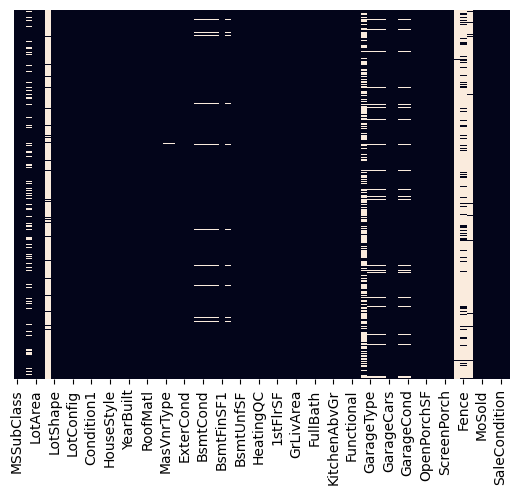

In [15]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False) 
plt.show()

In [16]:
null_values=pd.DataFrame()
null_values['per']=data.isnull().sum()/len(data)*100
null_values['count']=data.isnull().sum()

In [17]:
list(null_values[null_values['per']>50].index) # list of columns having null values more than 50%

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [18]:
# dropping columns having null values more than 50%
data.drop(list(null_values[null_values['per']>50].index), axis=1, inplace=True)

# Fillng the missing values

In [19]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])


In [20]:
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])


In [21]:
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [22]:
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])

In [23]:
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrType'].fillna(data['MasVnrArea'].mode()[0])

<AxesSubplot:>

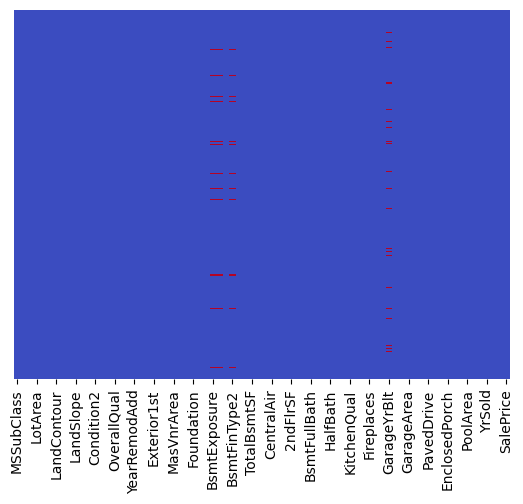

In [24]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [25]:
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

In [26]:
data.BsmtExposure=data.BsmtExposure.fillna(data.BsmtExposure.mode()[0])
data.BsmtFinType1=data.BsmtFinType1.fillna(data.BsmtFinType1.mode()[0])
data.GarageYrBlt=data.GarageYrBlt.fillna(data.GarageYrBlt.median())

In [27]:
data.isnull().sum() # no missing values left

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

# Handling Categorical Columns

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for column in data.columns:
    if data[column].dtype=="object":
        data[column]=lb.fit_transform(data[column])

In [29]:
(data.dtypes=="object").sum() # No object values left

0

In [30]:
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5       2003          2003   
1         0           2            6            8       1976          1976   
2         0           5            7            5       2001          2002   
3         0           5            7            5       1915          1970   
4         0           5            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1           12           13           1           1   
1          1         1            8            8           2           2   
2          1         1           12           13           1           1   
3          1         1           13           15           2           2   
4          1         1           12           13           1           1   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         3             3   
1          3          4           1         2         3             1   
2          2          4           2         2         3             2   
3          3          4           0         3         1             3   
4          2          4           2         2         3             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2         706             5           0        150          856   
1             0         978             5           0        284         1262   
2             2         486             5           0        434          920   
3             0         216             5           0        540          756   
4             2         655             5           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4       856       854   
1        1          0           1           4      1262         0   
2        1          0           1           4       920       866   
3        1          2           1           4       961       756   
4        1          0           1           4      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            2             8           6   
1             3             1            3             6           6   
2             3             1            2             6           6   
3             3             1            

# Handling Outliers

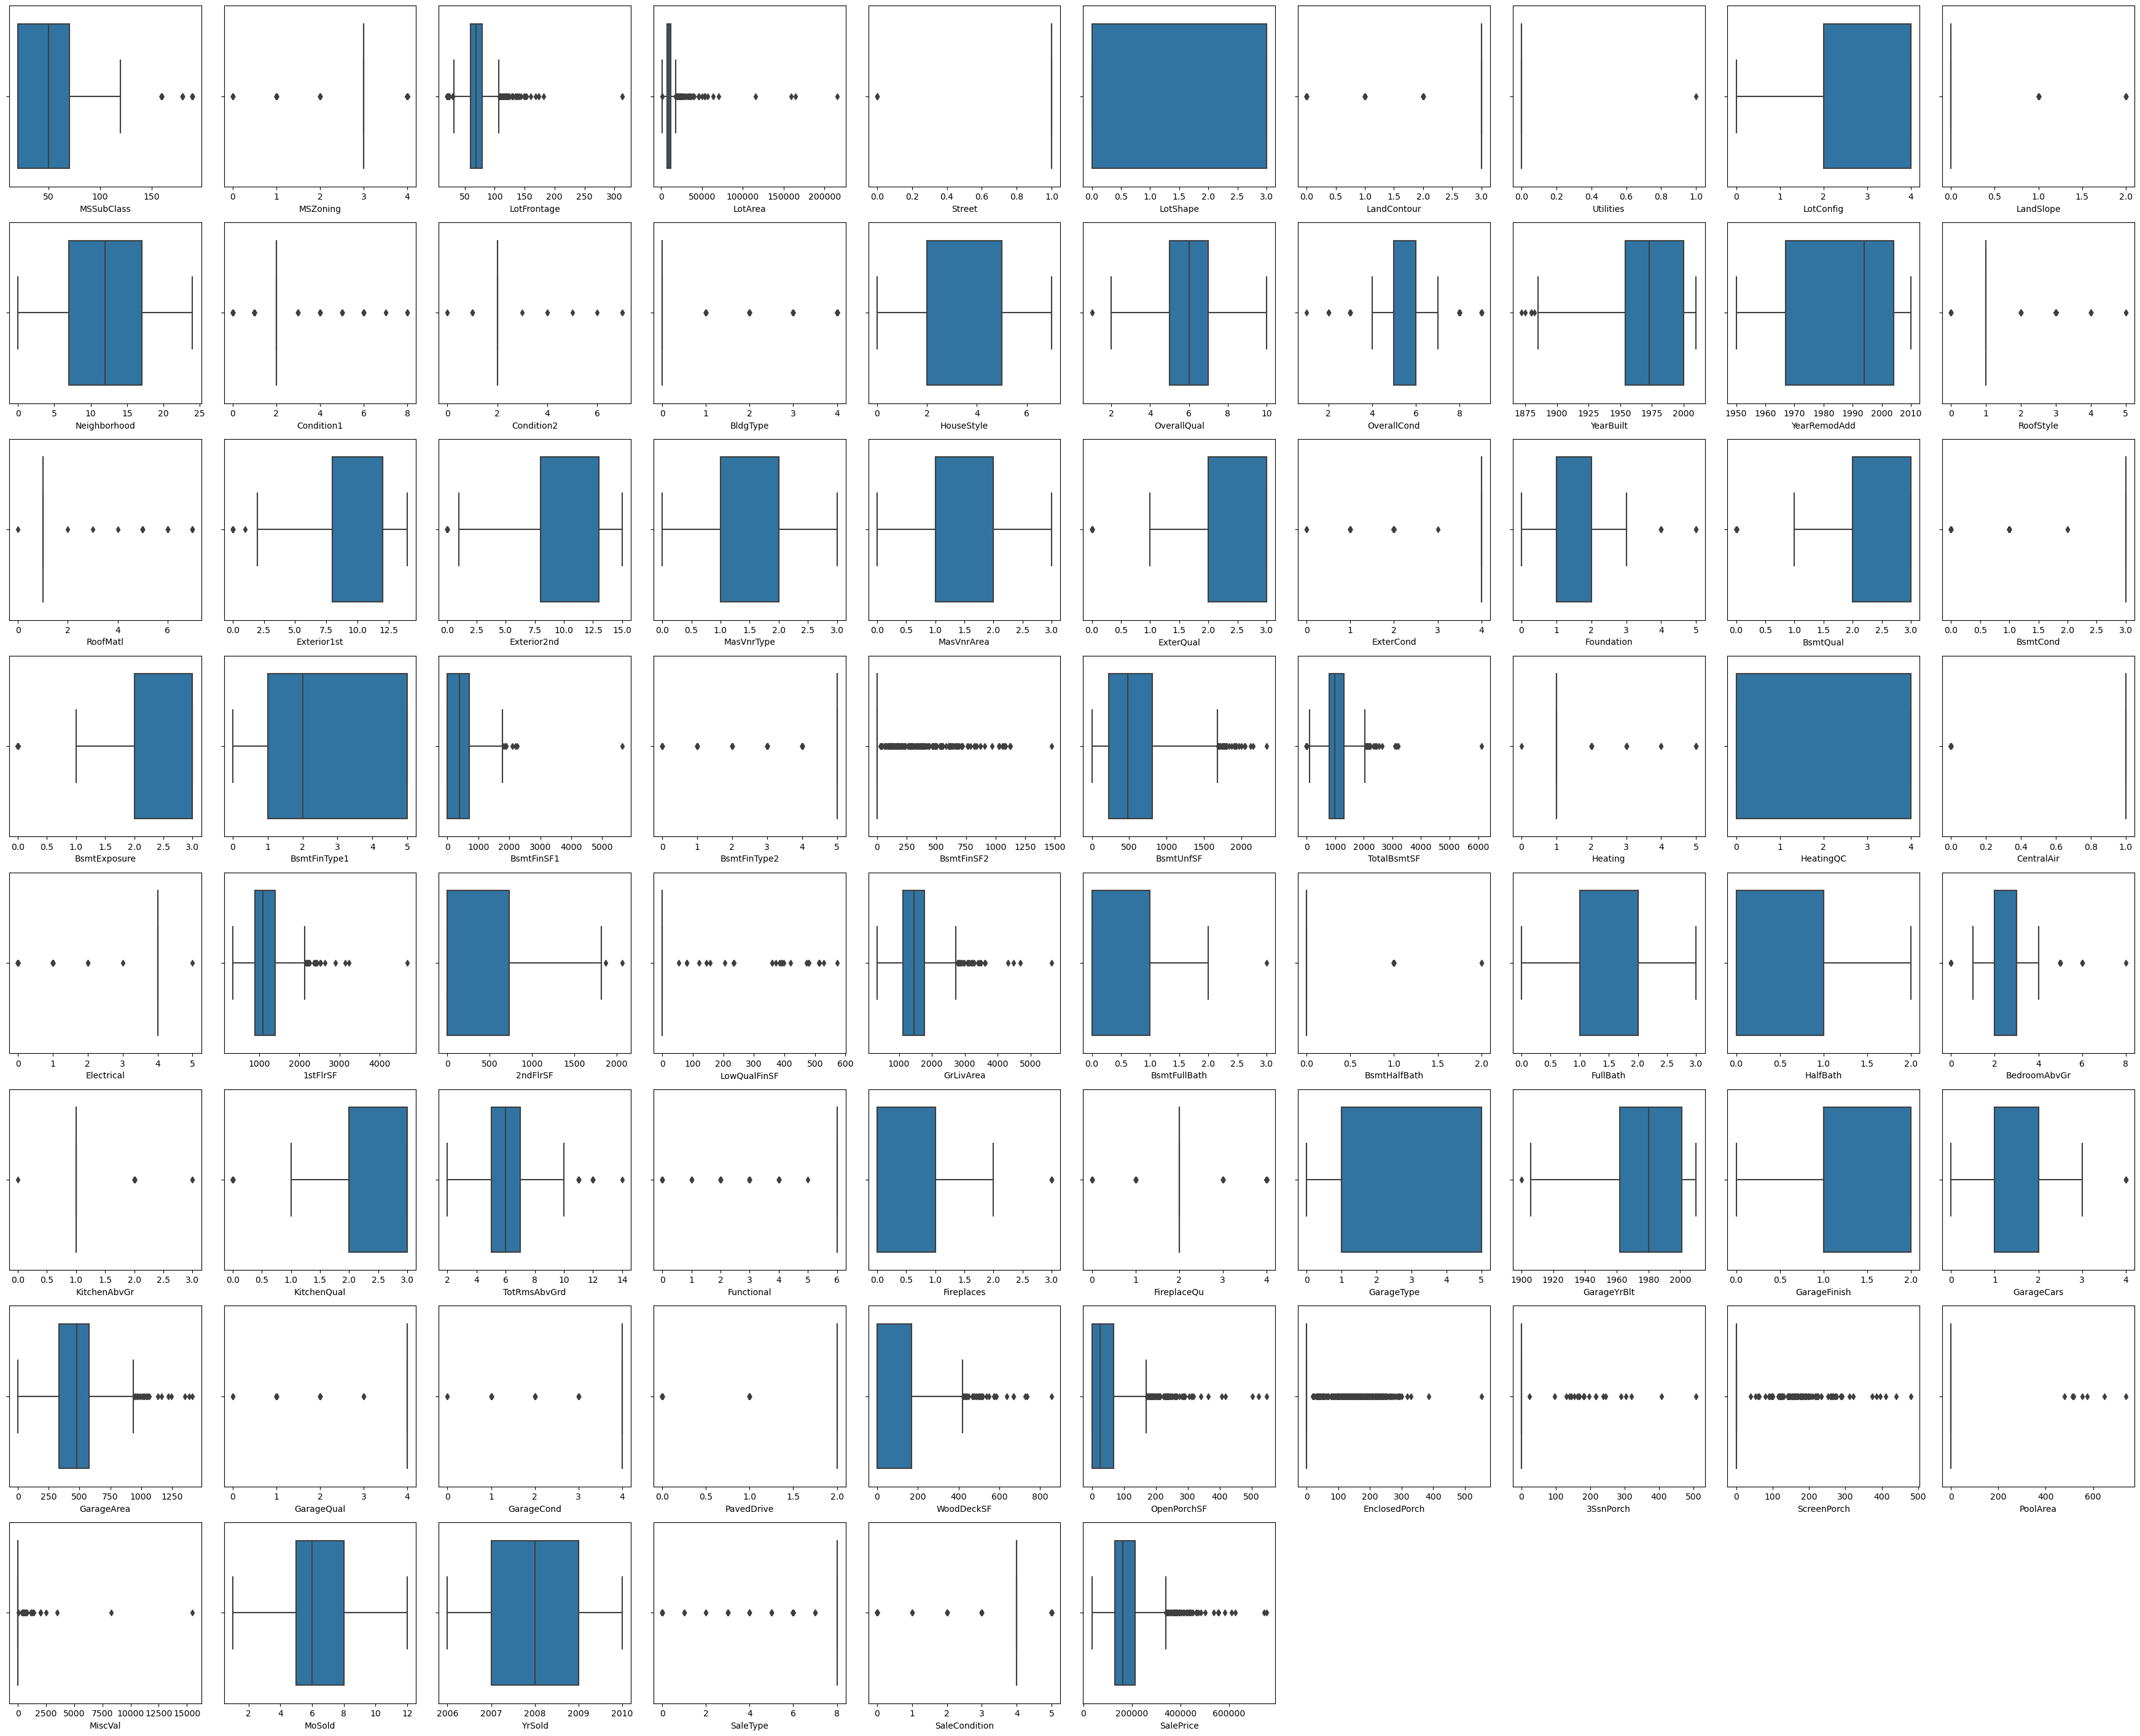

In [31]:
#Using boxplot to detect outliers
plt.figure(figsize=(35,35),facecolor='white')

plotnumber=1

for column in data:
        ax=plt.subplot(10,10,plotnumber)
        sns.boxplot(x = data[column])
        plotnumber+=1
plt.tight_layout() 

<AxesSubplot:>

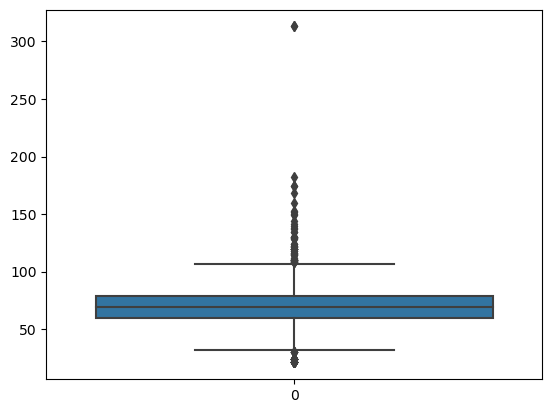

In [32]:
sns.boxplot(data.LotFrontage)

In [33]:
# Imputing outliers by IQR method
IQR=stats.iqr(data.LotFrontage,interpolation="midpoint")

#1st quartile 
Q1=data.LotFrontage.quantile(0.25)

#3rd quartile 
Q3=data.LotFrontage.quantile(0.75)


lower_limit=Q1-1.5*IQR #minimum limit


upper_limit=Q3+1.5*IQR #maximun limit

#replacing by median
data.loc[data["LotFrontage"]>upper_limit]=np.median(data.LotFrontage)

<AxesSubplot:>

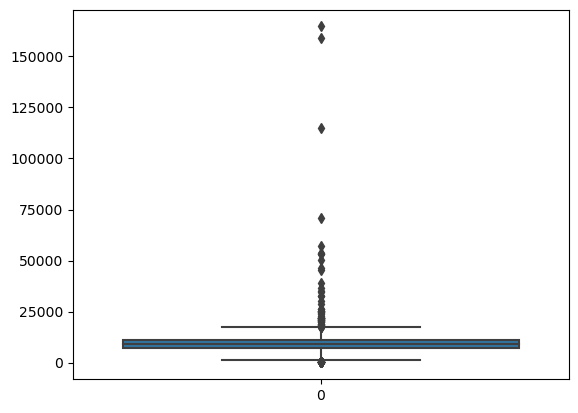

In [34]:
sns.boxplot(data.LotArea)

In [35]:
IQR=stats.iqr(data.LotArea,interpolation="midpoint")

Q1=data.LotArea.quantile(0.25)

Q3=data.LotArea.quantile(0.75)

lower_limit=Q1-1.5*IQR 

upper_limit=Q3+1.5*IQR 


data.loc[data["LotArea"]>upper_limit]=np.median(data.LotArea)

<AxesSubplot:>

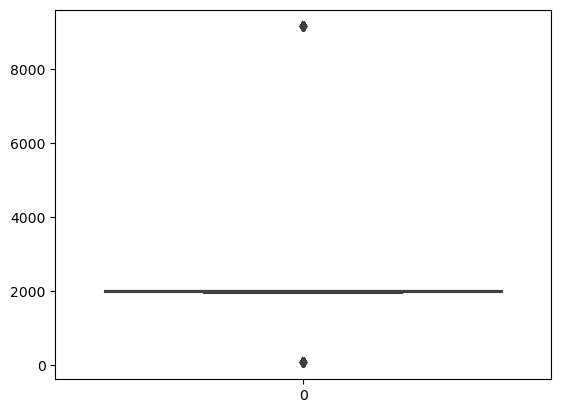

In [36]:
sns.boxplot(data.YearRemodAdd) # no outliers

<AxesSubplot:>

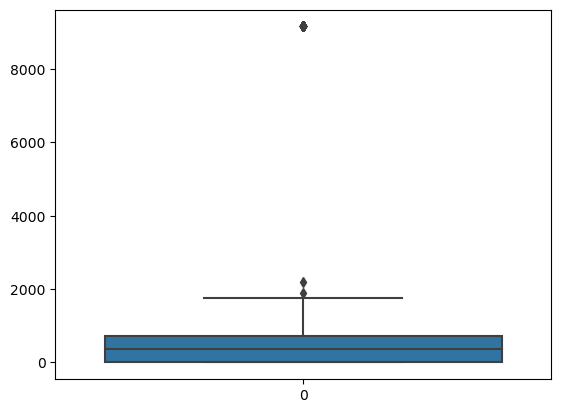

In [37]:
sns.boxplot(data.BsmtFinSF1)

In [38]:
IQR=stats.iqr(data.BsmtFinSF1,interpolation="midpoint")

Q1=data.BsmtFinSF1.quantile(0.25)

Q3=data.BsmtFinSF1.quantile(0.75)

lower_limit=Q1-1.5*IQR 

upper_limit=Q3+1.5*IQR 


data.loc[data["BsmtFinSF1"]>upper_limit]=np.median(data.BsmtFinSF1)

<AxesSubplot:>

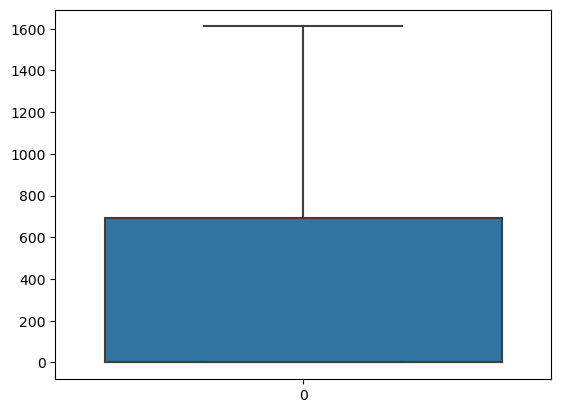

In [39]:
sns.boxplot(data["2ndFlrSF"]) # no outliers

<AxesSubplot:>

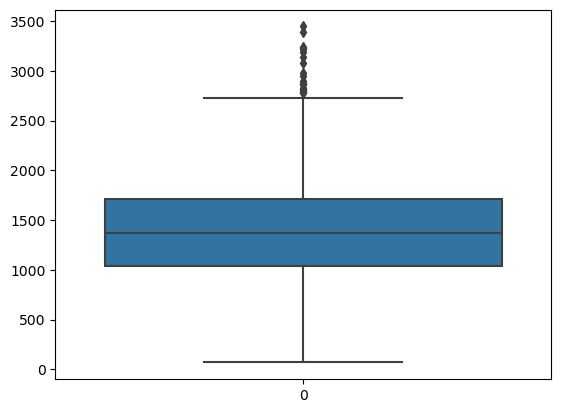

In [40]:
sns.boxplot(data.GrLivArea)

<AxesSubplot:>

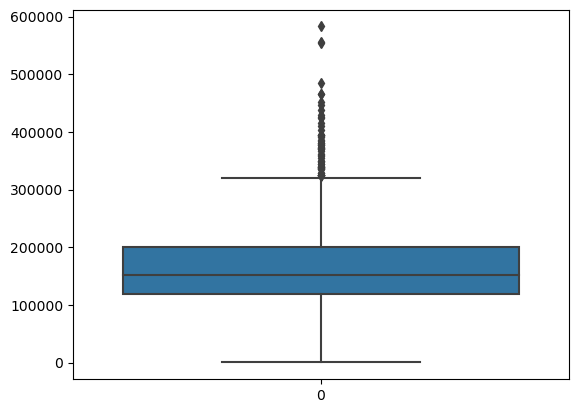

In [41]:
sns.boxplot(data.SalePrice)

In [42]:
data1=data[['MSSubClass','LotArea','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold','SalePrice']]

# Feature selection
# checking correlation 

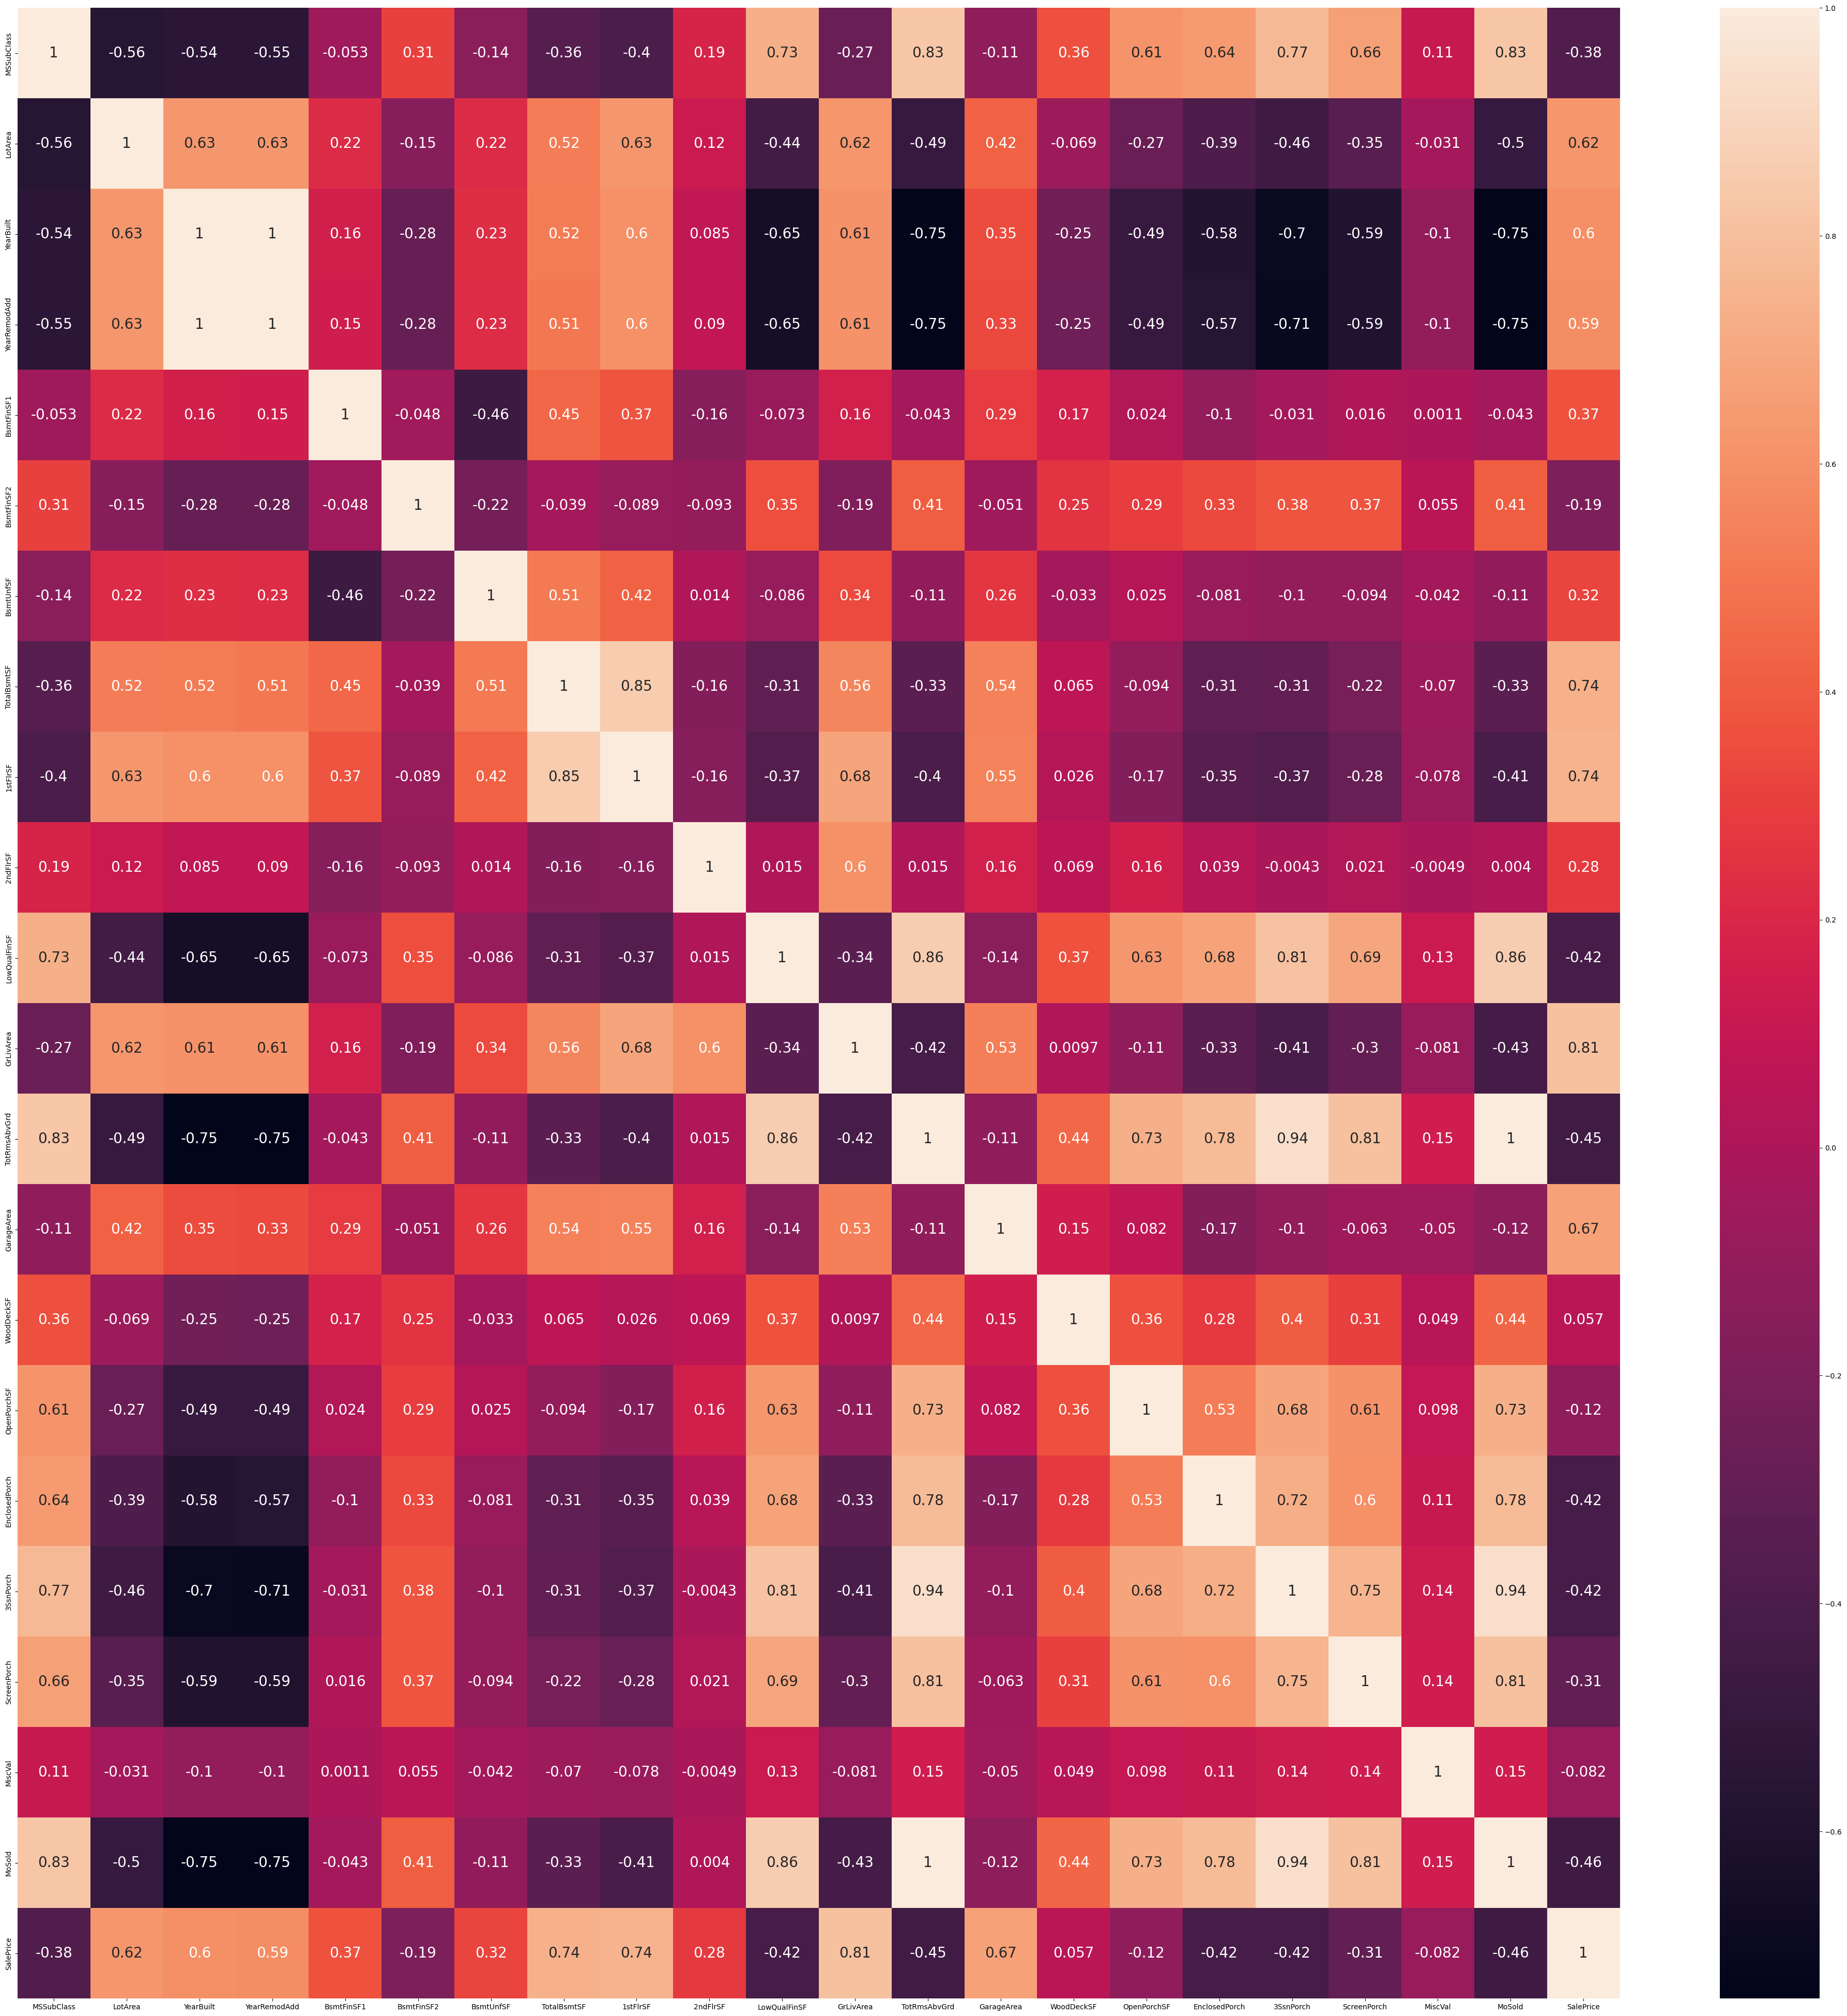

In [43]:
plt.figure(figsize=(50,50))
sns.heatmap(data1.corr(),annot=True,annot_kws={"size":20})
plt.show()

In [44]:
correlation=data1.corr()
threshold=0.9 # setting threshold

# Identify and eliminate highly correlated columns
columns_to_drop=[]
n_cols=len(correlation.columns)
for i in range(n_cols):
    for j in range(i+1, n_cols):
        if abs(correlation.iloc[i, j])>threshold:
            col_i=correlation.columns[i]
            col_j=correlation.columns[j]
            if col_i not in columns_to_drop:
                columns_to_drop.append(col_j)

In [45]:
columns_to_drop # Columns which has correlation more than 90%

['YearRemodAdd', '3SsnPorch', 'MoSold']

In [47]:
data.drop(['YearRemodAdd', '3SsnPorch', 'MoSold'],axis=1,inplace=True) #These columns are highly correlated so we can drop them

### creating the target variable

In [48]:
x=data.drop('SalePrice',axis=1)
y=data.SalePrice

In [49]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_final=sc.fit_transform(x)

## Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.3)

# Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr=LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred1=lr.predict(x_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error

In [57]:
r2_regression1=r2_score(y_test,y_pred1)# for testing data

In [58]:
r2_regression1

0.9236768517200167

In [59]:
x_train.shape

(1022, 72)

In [60]:
adj_r2score1 = 1-(1-r2_regression1)*(1022-72)/(1022-72-1)
print("adjusted r2score:", adj_r2score1 )

adjusted r2score: 0.9235964269062338


In [61]:
mse1=(mean_squared_error(y_test,y_pred1))
mse1

510052286.8822112

In [62]:
import math
rmse1=math.sqrt(mean_squared_error(y_test,y_pred1))
rmse1

22584.33720263252

# GradientBoosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [65]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [66]:
y_pred2=gb.predict(x_test)
y_pred2

array([ 2.56253299e+05,  1.34057204e+05,  1.35387107e+05,  1.57621291e+05,
        1.47265448e+05,  1.77024455e+05,  1.88411994e+05,  9.35812651e+04,
        4.32363259e+05,  2.06331930e+05,  1.34166216e+05,  1.69496990e+05,
        1.29354150e+05,  2.45678194e+05,  1.76246234e+05,  1.09004116e+05,
        1.12236623e+05,  2.67552672e+05,  3.10297326e+05,  1.15811196e+05,
        2.21631045e+05,  1.40650865e+05,  1.20088983e+05,  2.83973324e+05,
        1.27656263e+05,  9.93596710e+04,  1.48758790e+05,  1.76346069e+05,
        1.05802843e+05,  8.50454220e+04,  1.02188850e+05,  1.74914342e+05,
        1.84139414e+05,  2.12202529e+05,  1.29666078e+05,  1.09929241e+05,
        3.51375976e+05,  1.95779847e+05,  1.69105472e+03,  1.37618112e+05,
        1.47624391e+05,  1.96223194e+05,  1.46027390e+05,  1.94365159e+05,
        9.59556872e+04,  1.68967239e+05,  1.07908602e+05,  1.84242079e+05,
        1.02542564e+05,  2.53749423e+05,  1.30841135e+05,  2.13238450e+05,
        1.59317345e+05,  

In [67]:
r2_regression2=r2_score(y_test,y_pred2)# for testing data
r2_regression2

0.9324472949951418

In [68]:
adj_r2score2 = 1-(1-r2_regression2)*(1022-72)/(1022-72-1)
print("adjusted r2score:", adj_r2score2 )

adjusted r2score: 0.9323761119550945


In [69]:
mse2=(mean_squared_error(y_test,y_pred2))
mse2

451441174.12991506

In [70]:
rmse2=math.sqrt(mean_squared_error(y_test,y_pred2))
rmse2

21247.145081867235

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()  
dt.fit(x_train,y_train)#training the model
y_pred3=dt.predict(x_test)#prediction
y_pred3

array([2.61500e+05, 1.42500e+05, 1.40000e+05, 1.45250e+05, 1.65150e+05,
       1.92000e+05, 1.78000e+05, 6.45000e+04, 3.74000e+05, 1.89000e+05,
       1.37000e+05, 1.25000e+05, 9.70000e+04, 3.11872e+05, 1.51400e+05,
       1.15000e+05, 9.30000e+04, 2.36500e+05, 2.90000e+05, 1.32000e+05,
       2.39000e+05, 1.32500e+05, 1.52000e+05, 2.80000e+05, 1.30000e+05,
       1.12000e+05, 1.35000e+05, 1.78000e+05, 1.07900e+05, 3.49000e+04,
       1.06000e+05, 1.61000e+05, 1.80500e+05, 2.79500e+05, 1.08000e+05,
       9.70000e+04, 3.86250e+05, 2.02665e+05, 3.77500e+02, 1.37500e+05,
       1.12000e+05, 1.65400e+05, 1.37000e+05, 2.34000e+05, 8.25000e+04,
       1.85500e+05, 1.33000e+05, 1.99900e+05, 1.52000e+05, 2.50000e+05,
       1.18000e+05, 1.30000e+05, 1.45250e+05, 2.50000e+05, 2.44600e+05,
       1.94500e+05, 3.19000e+05, 1.33000e+05, 4.65000e+05, 1.65600e+05,
       2.48328e+05, 1.40000e+05, 1.04900e+05, 1.18000e+05, 1.71000e+05,
       1.42000e+05, 1.11250e+05, 1.40000e+05, 6.90000e+01, 3.619

In [72]:
r2_regression3=r2_score(y_test,y_pred3)
r2_regression3

0.8004148054398412

In [73]:
adj_r2score3 = 1-(1-r2_regression3)*(1022-72)/(1022-72-1)
print("adjusted r2score:", adj_r2score3 )

adjusted r2score: 0.8002044943812952


In [74]:
mse3=(mean_squared_error(y_test,y_pred3))
mse3

1333787811.5273972

In [75]:
rmse3=math.sqrt(mean_squared_error(y_test,y_pred3))
rmse3

36521.05983576322

# XGBoost

In [76]:

import xgboost
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred4=xg.predict(x_test)

In [77]:
r2_regression4=r2_score(y_test,y_pred4)
r2_regression4

0.9141553695116108

In [78]:
adj_r2score4 = 1-(1-r2_regression4)*(1022-72)/(1022-72-1)
print("adjusted r2score:", adj_r2score4 )

adjusted r2score: 0.914064911523741


In [79]:
mse4=(mean_squared_error(y_test,y_pred4))
mse4

573682442.1411408

In [80]:
rmse4=math.sqrt(mean_squared_error(y_test,y_pred4))
rmse4

23951.668880083093

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf=RandomForestRegressor()

In [83]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
y_pred5=rf.predict(x_test)

In [85]:
r2_regression5=r2_score(y_test,y_pred5)# for testing data
r2_regression5

0.9202242349725848

In [86]:
adj_r2score5 = 1-(1-r2_regression5)*(1022-72)/(1022-72-1)
print("adjusted r2score:", adj_r2score5 )

adjusted r2score: 0.9201401719957382


In [87]:
mse5=(mean_squared_error(y_test,y_pred5))
mse5

533125431.8905296

In [88]:
rmse5=math.sqrt(mean_squared_error(y_test,y_pred5))
rmse5

23089.509130566843

# Hyperparameter Tuning

### Grid Search CV

In [ ]:
# Number of trees in random forest
n_estimators=[20,40,100,120]
# Number of features to consider at every split
max_features=[0.2,0.6,1.0]
# maximum number of levels in tree
max_depth=[2,8,None]
#Number of samples
max_samples=[0.5,0.75,1.0]


In [ ]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples
           }
print(param_grid)

In [ ]:
rf=RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_grid=GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)

In [ ]:
rf_grid.fit(x_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
# Random Search CV

In [ ]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
bootstrap=[True,False]
# Minimum number of samples required
min_samples_split=[2,5]

# Miniimum no of samples required at each leaf node
min_samples_leaf=[1,2]

In [ ]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            'bootstrap':bootstrap,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
           }
print(param_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_grid=RandomizedSearchCV(estimator=rf,
                          param_distributions=param_grid,
                          cv=5,
                          verbose=2,
                          n_jobs=-1)

In [ ]:
rf_grid.fit(x_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [89]:
# creating a dictionary
dict={"Model":["Linear_Regression","GradientBoosting","DecisionTreeRegressor","XGBoost_Regressor","RandomForest_Regressor"],
     "MSE":[mse1,mse2,mse3,mse4,mse5],
     "RMSE":[rmse1,rmse2,rmse3,rmse4,rmse5],
     "r2_Score":[r2_regression1,r2_regression2,r2_regression3,r2_regression4,r2_regression5],
     "adjusted_r2":[adj_r2score1,adj_r2score2,adj_r2score3,adj_r2score4,adj_r2score5]}

In [90]:
scores=pd.DataFrame(dict)
scores

Model           MSE          RMSE  r2_Score  adjusted_r2
0       Linear_Regression  5.100523e+08  22584.337203  0.923677     0.923596
1        GradientBoosting  4.514412e+08  21247.145082  0.932447     0.932376
2   DecisionTreeRegressor  1.333788e+09  36521.059836  0.800415     0.800204
3       XGBoost_Regressor  5.736824e+08  23951.668880  0.914155     0.914065
4  RandomForest_Regressor  5.331254e+08  23089.509131  0.920224     0.920140

In [91]:
score=scores.sort_values(by="adjusted_r2")
score

Model           MSE          RMSE  r2_Score  adjusted_r2
2   DecisionTreeRegressor  1.333788e+09  36521.059836  0.800415     0.800204
3       XGBoost_Regressor  5.736824e+08  23951.668880  0.914155     0.914065
4  RandomForest_Regressor  5.331254e+08  23089.509131  0.920224     0.920140
0       Linear_Regression  5.100523e+08  22584.337203  0.923677     0.923596
1        GradientBoosting  4.514412e+08  21247.145082  0.932447     0.932376

## 1.from the above table we can say that the GradientBoostingRegressor has the highest r2_score ,that's why it is a best model.
## 2.challenges faced while doing this project:Data preprocessing and feature selection.and just followed the proper pipeline, regression technique and ensemble techniques to build a model and to solve the difficulties occured during this project.

In [92]:
# getting important features
gb.feature_importances_

array([1.61071024e-04, 5.55837188e-03, 2.99918572e-04, 1.65735468e-02,
       0.00000000e+00, 2.90645411e-05, 6.30379718e-04, 0.00000000e+00,
       2.48804097e-04, 3.10695791e-04, 3.00489376e-03, 1.82245510e-04,
       2.30919314e-04, 1.39135250e-04, 3.01357868e-06, 1.35840762e-01,
       5.30089607e-03, 1.07322611e-01, 0.00000000e+00, 0.00000000e+00,
       6.11206396e-04, 1.49813270e-04, 7.62772726e-04, 1.92324073e-03,
       7.34926647e-02, 0.00000000e+00, 1.18705944e-05, 2.27762792e-02,
       1.86607341e-04, 4.44568862e-04, 3.55014495e-03, 1.35604328e-02,
       4.64915540e-05, 3.54338302e-04, 1.54040588e-03, 3.08451041e-02,
       1.14570779e-02, 1.20861041e-03, 5.96645659e-04, 1.39699852e-05,
       1.25021904e-01, 1.22540400e-03, 5.61665488e-05, 3.03518793e-01,
       4.56658065e-05, 1.10148696e-04, 8.53661530e-04, 1.10735827e-04,
       1.61883156e-04, 3.10762968e-04, 1.42890500e-02, 3.48060771e-04,
       4.47687708e-04, 2.71918350e-03, 7.89454750e-05, 1.65737132e-04,
      

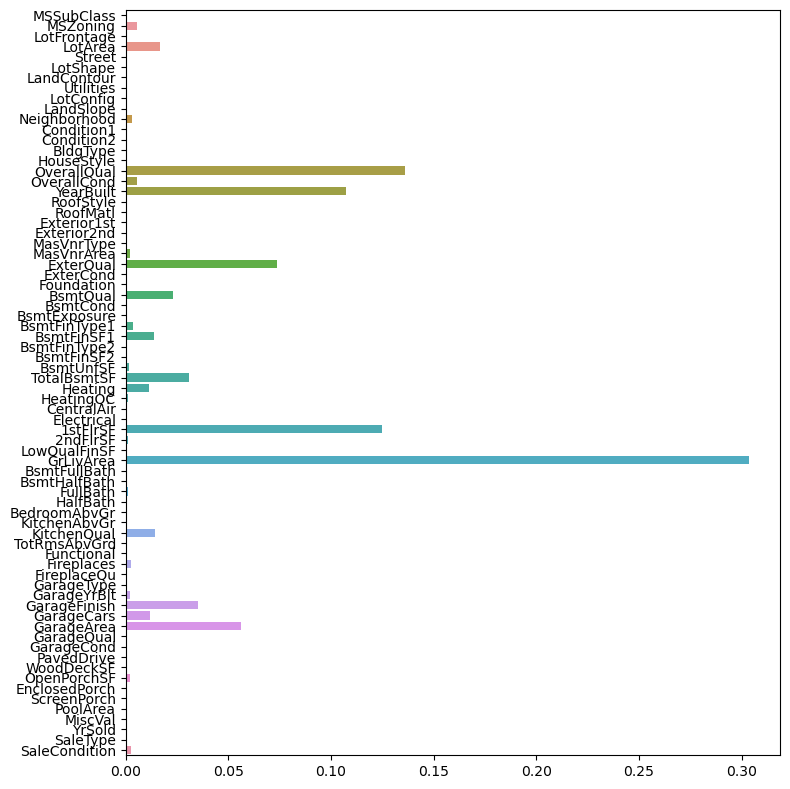

In [93]:
plt.figure(figsize=(8,8))
sns.barplot(x=gb.feature_importances_,y=x.columns)
plt.tight_layout()

### According to the above plot the features that effect price the most are:
### "GrLivArea(living area square feet)",
### "YearBuilt(original construction date)",
### "OverAllQual(overall material and finish quality)",
### "1stFlr(1 st floor square feet)",
### "ExterQual(Exterior material quality)"..

### if one wants to buy house ,needs to check the features suggested above in house.